## Código

In [ ]:
import random
import matplotlib.pyplot as plt

class Tablero:
    def __init__(self, tamaño):
        # Validar que el tamaño sea un múltiplo de 10, mayor que cero, y hasta 100
        if tamaño <= 0 or tamaño > 100 or tamaño % 10 != 0:
            raise ValueError("El tamaño debe ser un múltiplo de 10, mayor que cero y máximo de 100.")

        self.tamaño = tamaño
        self.matriz = []
        self.posiciones = {'Jugador1': 1, 'PC': 1}  # Posiciones iniciales de los jugadores
        self.ocupados = []  # Lista para guardar posiciones ocupadas por serpientes y escaleras

        # Crear el tablero
        self.crear_tablero()

    def crear_tablero(self):
        # Definir la base del tablero dependiendo del tamaño
        if self.tamaño <= 50:
            base = 5
        else:
            base = 10

        # Crear la matriz
        fila = []
        valor = self.tamaño
        while valor > 0:
            fila.insert(0, valor)
            valor -= 1
            if len(fila) == base:
                self.matriz.insert(0, fila)
                fila = []
        if fila:
            self.matriz.insert(0, fila)

    def generar_serpientes(self):
        serpientes = {}
        cantidad_serpientes = int(0.07 * self.tamaño)

        while len(serpientes) < cantidad_serpientes:
            key = random.randint(2, self.tamaño)  # Evitar que una serpiente comience en la posición 1
            element = random.randint(1, key - 1)

            if key not in self.ocupados and element not in self.ocupados:
                serpientes[key] = element
                self.ocupados.extend([key, element])

        return serpientes

    def generar_escaleras(self):
        escaleras = {}
        cantidad_escaleras = int(0.05 * self.tamaño)

        while len(escaleras) < cantidad_escaleras:
            key = random.randint(1, self.tamaño - 1)  # Evitar que una escalera comience en la última casilla
            element = random.randint(key + 1, self.tamaño)

            if key not in self.ocupados and element not in self.ocupados:
                escaleras[key] = element
                self.ocupados.extend([key, element])

        return escaleras

    def graficar(self, serpientes, escaleras):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([])
        ax.set_yticks([])

        # Graficar las casillas en un patrón de ajedrez
        for i, fila in enumerate(self.matriz):
            for j, valor in enumerate(fila):
                color = 'white' if (i + j) % 2 == 0 else 'gray'
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
                ax.text(j + 0.5, i + 0.5, str(valor), va='center', ha='center', fontsize=12, color='black')

        # Graficar las serpientes (líneas rojas)
        for key, element in serpientes.items():
            fila_key, col_key = self.encontrar_posicion(key)
            fila_element, col_element = self.encontrar_posicion(element)
            ax.plot([col_key + 0.5, col_element + 0.5], [fila_key + 0.5, fila_element + 0.5], 'r', lw=2)

        # Graficar las escaleras (líneas azules)
        for key, element in escaleras.items():
            fila_key, col_key = self.encontrar_posicion(key)
            fila_element, col_element = self.encontrar_posicion(element)
            ax.plot([col_key + 0.5, col_element + 0.5], [fila_key + 0.5, fila_element + 0.5], 'b', lw=2)

        # Graficar las posiciones de los jugadores
        for jugador, posicion in self.posiciones.items():
            fila, col = self.encontrar_posicion(posicion)
            color = 'blue' if jugador == 'Jugador1' else 'green'
            ax.plot(col + 0.5, fila + 0.5, 'o', color=color, markersize=15, label=jugador)

        plt.gca().invert_yaxis()
        plt.legend()
        plt.show()

    def encontrar_posicion(self, valor):
        for i, fila in enumerate(self.matriz):
            if valor in fila:
                return i, fila.index(valor)
        return None, None

    def tirar(self, serpientes, escaleras):

            # Jugador 1 tira el dado
            dado_jugador1 = random.randint(1, 6)
            print(f"Jugador 1 tiró un {dado_jugador1}")
            self.posiciones['Jugador1'] += dado_jugador1
            if self.posiciones['Jugador1'] in serpientes:
                print("Jugador 1 cayó en una serpiente!")
                self.posiciones['Jugador1'] = serpientes[self.posiciones['Jugador1']]
            elif self.posiciones['Jugador1'] in escaleras:
                print("Jugador 1 subió por una escalera!")
                self.posiciones['Jugador1'] = escaleras[self.posiciones['Jugador1']]

            # PC tira el dado
            dado_pc = random.randint(1, 6)
            print(f"PC tiró un {dado_pc}")
            self.posiciones['PC'] += dado_pc
            if self.posiciones['PC'] in serpientes:
                print("PC cayó en una serpiente!")
                self.posiciones['PC'] = serpientes[self.posiciones['PC']]
            elif self.posiciones['PC'] in escaleras:
                print("PC subió por una escalera!")
                self.posiciones['PC'] = escaleras[self.posiciones['PC']]

            # Graficar el tablero con las posiciones actuales
            self.graficar(serpientes, escaleras)

            # Verificar si alguien ganó
            if self.posiciones['Jugador1'] >= self.tamaño:
                print("Jugador 1 ha ganado!")

            elif self.posiciones['PC'] >= self.tamaño:
                print("PC ha ganado!")




## Generar tablero

Introduce el tamaño del tablero (múltiplo de 10, máximo 100): 30


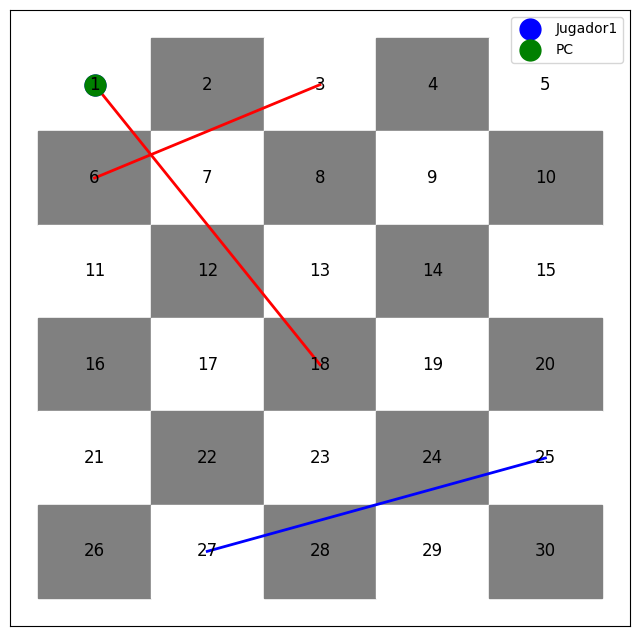

In [ ]:
# Generar tablero
tamaño = int(input("Introduce el tamaño del tablero (múltiplo de 10, máximo 100): "))
tablero = Tablero(tamaño)
#Generar serpientes y escaleras
serpientes = tablero.generar_serpientes()
escaleras = tablero.generar_escaleras()
#Graficar
tablero.graficar(serpientes, escaleras)

## Tirar

Jugador 1 tiró un 5
PC tiró un 4


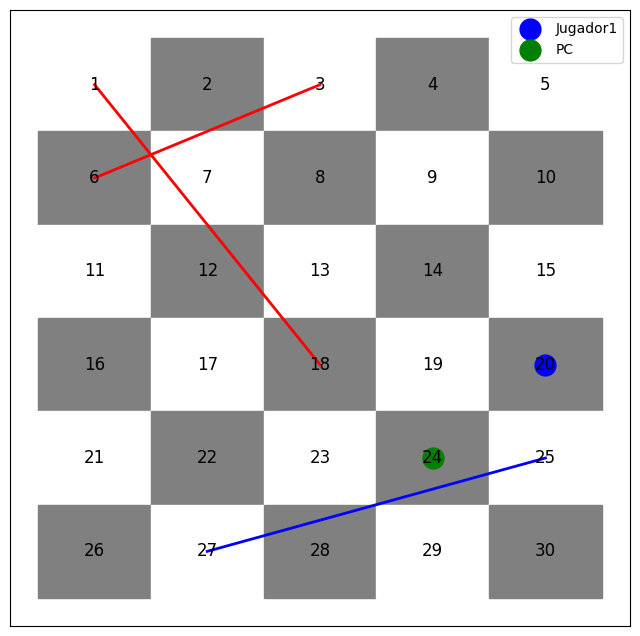

In [ ]:
tablero.tirar(serpientes, escaleras)